In [24]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

def arma_filter(a, b, x):
    P = len(a)  # AR order
    Q = len(b)  # MA order
    N = len(x)  # Length of the input signal

    y = np.zeros(N)  # Initialize output array

    for n in range(N):
        # Compute the AR contribution: -sum_{k=1..P} a[k] * y[n-k]
        ar_sum = 0.0
        for k in range(1, P + 1):
            if n - k >= 0:
                ar_sum += a[k - 1] * y[n - k]

        # Compute the MA contribution: sum_{k=0..Q} b[k] * x[n-k]
        ma_sum = 0.0
        for k in range(Q):
            if n - k >= 0:
                ma_sum += b[k] * x[n - k]

        # Combine them (notice the minus sign on the AR part)
        y[n] = -ar_sum + ma_sum

    return y

def plot_arma(a, b, x):
    y = arma_filter(a, b, x)

    # Plot the original and filtered signals
    plt.figure(figsize=(12, 6))
    plt.plot(x, label='Original Signal x')
    plt.plot(y, label='Filtered Signal y')
    plt.title('Original and Filtered Signals')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    # Print the difference equation
    ar_terms = ' - '.join([f'{a[i]}*y[n-{i+1}]' for i in range(len(a))])
    ma_terms = ' + '.join([f'{b[i]}*x[n-{i}]' for i in range(len(b))])
    difference_equation = f'y[n] = -({ar_terms}) + ({ma_terms})'

    # Add the difference equation to the plot
    plt.text(0.05, 0.95, difference_equation, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

    plt.show()

    print("Difference Equation:")
    print(difference_equation)

# Example usage
x = np.sin(2 * np.pi * 8 * np.linspace(0, 2, 100))  # 3Hz sine wave for 2 seconds
a = [0.5, -0.2]  # Example AR coefficients
b = [1.0, 0.5, 0.3]  # Example MA coefficients

interact(plot_arma, a=fixed(a), b=fixed(b), x=fixed(x))




interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.plot_arma(a, b, x)>

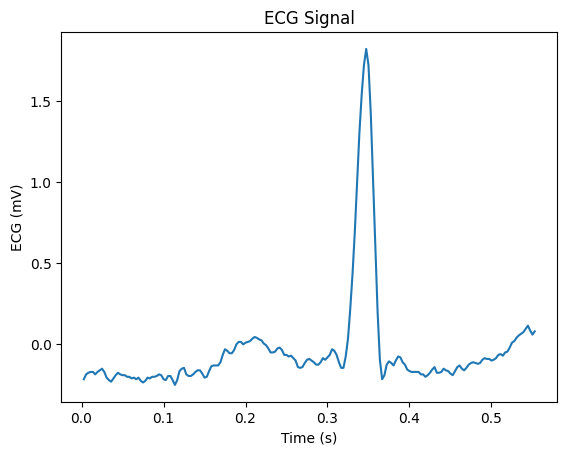

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pooch
from scipy.datasets import electrocardiogram


ecg = electrocardiogram()

fs = 360  # Sampling frequency in Hz

x=ecg[1:200]
time = np.arange(ecg.size) / fs
time = time[1:200]
plt.plot(time,x)
plt.xlabel("Time (s)")
plt.ylabel("ECG (mV)")
plt.title("ECG Signal")
plt.show()

In [27]:
x = ecg[1:200]
a = [0.5, -1.2]  # Example AR coefficients
b = [1.0, 0.5, 0.3]  # Example MA coefficients

interact(plot_arma, a=fixed(a), b=fixed(b), x=fixed(x))


interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.plot_arma(a, b, x)>